# Fit hyper-parameters

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm
from glob import glob
import pwca
from pwca import determine_data_fitting_region,pwca_catalog,metadata_dict,advanced_gmvx_plot

## This is notebook is only for scratch code and prototyping

In [2]:
# Load and unpuack physical parameter space
raw_domain = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_intial_binary_parameters.txt')
theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2,a1,a2 = raw_domain.T


# Define desired model domain variables and array 
u = cos(theta)
v = sin(theta)
q = 1.0/eta2q(eta)
model_domain = array( [ u, eta, a1 ] ).T

# Load and unpuack physical parameter space -- dphi
dphi_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_dphase_parameters.txt')
nu4,nu5,nu6 = dphi_range.T

# Load and unpuack physical parameter space -- amp
amp_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_amplitude_parameters.txt')
mu1, mu2, mu3, mu4 = amp_range.T

# labels={'python':['nu4',('u', 'eta', 'chi_eff', 'chi_p'),''],'latex':['nu4',(r'u', r'\eta', r'\chi_s', r'\chi_p'),'']}

In [21]:

# version 1: u, eta, chi_eff, chi_p
# syntax: 
# nu5, mu2

# version 2: u, eta, a1
# syntax: gmvpfit( trial_model_domain, mu1,fitatol=0.001,verbose=True,maxdeg_list=[4,3,1],center=True)
# nu4, nu6, mu1, mu3, mu4 

'''
* use mvr for nu5, mu2, mu4
'''

# # nu4
# # ---
# # foo = gmvpfit( model_domain, nu4,fitatol=0.001,verbose=True,maxdeg_list=[4,3,1],center=True)
# advanced_gmvx_plot(foo); show();

# nu5
# ---
foo = gmvrfit( model_domain, nu5,fitatol=0.001,verbose=True,maxdeg_list=[4,3,1],center=True)
advanced_plot_v2(foo); show();

# # nu6
# # ---
# foo = gmvpfit( model_domain, nu6,fitatol=0.001,verbose=True,maxdeg_list=[4,3,1],center=True)
# advanced_plot_v2(foo); show();

# # mu1 
# # ---
# foo = gmvpfit( model_domain, mu1,fitatol=0.001,verbose=True,maxdeg_list=[4,3,1],center=True)
# advanced_plot_v2(foo); show();

# # mu2
# # ---
# # not overfit
# foo = gmvrfit( model_domain, mu2,fitatol=0.001,verbose=True,maxdeg_list=[4,3,1],center=True)
# advanced_plot_v2(foo); show();

# # mu3
# # ---
# # not overfit
# foo = gmvpfit( model_domain, mu3,fitatol=0.001,verbose=True,maxdeg_list=[4,3,1],center=True)
# advanced_plot_v2(foo); show();

# # mu4
# # ---
# # not overfit
# foo = gmvrfit( model_domain, mu4,fitatol=0.001,verbose=True,maxdeg_list=[4,3,1],center=True)
# advanced_plot_v2(foo); show();

(gmvrfit)>> Now working deg = 1
&& The estimator has changed by -inf
&& Degree tempering will continue.
&& The current boundary is [('0', True), ('1', True), ('2', True), ('2', False)]
&& The current estimator value is 0.659884

(gmvrfit)>> Now working deg = 2
&& The estimator has changed by -0.437166
&& Degree tempering will continue.
&& The current boundary is [('01', True), ('1', True), ('00', True), ('0', True), ('02', False), ('1', False), ('11', True), ('12', True), ('2', True)]
&& The current estimator value is 0.222718

(gmvrfit)>> Now working deg = 3
&& The estimator has changed by -0.112058
&& Degree tempering will continue.
&& The current boundary is [('011', True), ('001', True), ('1', True), ('02', False), ('1', False), ('00', True), ('001', False), ('12', True), ('000', False), ('012', True), ('002', True), ('2', True), ('11', True), ('01', True), ('111', False)]
&& The current estimator value is 0.110660

(gmvrfit)>> Now working deg = 4
&& The estimator has changed by -0

NameError: name 'advanced_plot_v2' is not defined

In [504]:
#
def advanced_plot_v2( fit_object ):
    
    # Load and unpuack physical parameter space
    raw_domain = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_intial_binary_parameters.txt')
    theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2,a1,a2 = raw_domain.T


    # Define desired model domain variables and array 
    u = cos(theta)
    v = sin(theta)
    q = 1.0/eta2q(eta)
    
    # Load and unpuack physical parameter space -- dphi
    dphi_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_dphase_parameters.txt')
    nu4,nu5,nu6 = dphi_range.T

    # Load and unpuack physical parameter space -- amp
    amp_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_amplitude_parameters.txt')
    mu1, mu2, mu3, mu4 = amp_range.T

    # --------------------------------------- #
    # Plot ans save fits 
    # --------------------------------------- #

    # Collect set of unique a1 values
    a1_point = around(a1,2)
    a1_set = array(sort(list( set(a1_point) )))

    # Collect set of unique angle values
    degree_point = (theta*180/pi).astype(int)
    theta_point = degree_point*pi/180
    theta_set = array(sort(list( set(theta_point) )))

    # Collect set of unique mass-ratio values
    q_point = around(array([eta2q(n) for n in eta]),2)
    q_set = array(sort(list( set(q_point) )))

    # Collect set of unique eta values
    eta_point = q2eta( q_point )
    eta_set = q2eta(q_set)

    # Summaru figure for internal diagnostics 
    summary_fig = fit_object.plot(size_scale=1.5)
    ax = summary_fig.axes
    
    #
    num_figs = len(a1_set)*len(theta_set)
    set_figs,set_fig_ax = subplots( len(a1_set), len(theta_set), figsize=5*array([ len(theta_set),len(a1_set) ]) )
    set_fig_ax = set_fig_ax.flatten();
    tight_layout(4,4)
    ax_counter = 0

    #
    for _a1 in a1_set:
        for _theta in theta_set:

            #
            theta_mask = (_theta==theta_point)
            a1_mask = (_a1==a1_point)
            mask = a1_mask & theta_mask

            #
            _eta = eta_point[mask]
            _u = cos(_theta) 

            #
            case_eta   = linspace( min(_eta),max(_eta),1000 ) # 
            case_q     = 1.0/eta2q(case_eta)  
            case_theta = _theta * ones_like(case_eta)
            case_u     = cos(case_theta)
            case_a1    = _a1    * ones_like(case_eta)

            #
            case_domain = array([case_u,case_eta,case_a1]).T
            case_range = fit_object.eval(case_domain)
            opt_range  = fit_object.eval(fit_object.domain[mask,:])

            #
            sca(ax[0])
            ax[0].plot3D( case_u, case_eta, case_range, lw=1, alpha=1, color = 'tab:blue' if _a1==a1_set[0] else 'red' )
            
            #
            sca( set_fig_ax[ax_counter] ); ax_counter += 1
            plot( eta[mask], fit_object.range[mask] if hasattr(fit_object,'range') else fit_object.scalar_range[mask], marker='o',ls='none'  )
            plot( eta[mask], opt_range, marker='o',ms=10,mfc='none', color='r',ls='none'  )
            plot( case_eta, case_range, ls='-', color='r' )
            title( r'$a_1=%1.2f$, $\theta=%1.2f$'%(_a1,round(_theta*180.0/pi,0)) )
            xlabel(r'$\eta$')
            

    
    #
    num_figs = len(a1_set)*len(eta_set)
    set_figs,set_fig_ax = subplots( len(a1_set), len(eta_set), figsize=5*array([ len(eta_set),len(a1_set) ]) )
    set_fig_ax = set_fig_ax.flatten();
    tight_layout(4,4)
    ax_counter = 0

    #
    for _a1 in a1_set:
        for _eta in eta_set:

            #
            eta_mask = (_eta==eta_point)
            a1_mask = (_a1==a1_point)
            mask = a1_mask & eta_mask

            #
            _theta = theta_point[mask]
            _u = cos(_theta) 

            #
            case_theta   = linspace( min(_theta),max(_theta),1000 ) # 
            case_u     = cos(case_theta)
            case_eta   = _eta * ones_like(case_theta)
            case_a1    = _a1  * ones_like(case_theta)

            #
            case_domain = array([case_u,case_eta,case_a1]).T
            case_range = fit_object.eval(case_domain)
            opt_range  = fit_object.eval(fit_object.domain[mask,:])

            #
            sca(ax[0])
            ax[0].plot3D( case_u, case_eta, case_range, lw=1, alpha=1, color = 'tab:blue' if _a1==a1_set[0] else 'red' )
            
            #
            sca( set_fig_ax[ax_counter] ); ax_counter += 1
            plot( theta[mask], fit_object.range[mask] if hasattr(fit_object,'range') else fit_object.scalar_range[mask], marker='o',ls='none',color='r'  )
            plot( theta[mask], opt_range, marker='o',ms=10,mfc='none', color='b',ls='none'  )
            plot( case_theta, case_range, ls='-', color='b' )
            xlabel(r'$\cos(\theta)$')

In [505]:
#
def advanced_plot_v1( fit_object ):
    
    # Load and unpuack physical parameter space
    raw_domain = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_intial_binary_parameters.txt')
    theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2,a1,a2 = raw_domain.T


    # Define desired model domain variables and array 
    u = cos(theta)
    v = sin(theta)
    q = 1.0/eta2q(eta)
    
    # Load and unpuack physical parameter space -- dphi
    dphi_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_dphase_parameters.txt')
    nu4,nu5,nu6 = dphi_range.T

    # Load and unpuack physical parameter space -- amp
    amp_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_amplitude_parameters.txt')
    mu1, mu2, mu3, mu4 = amp_range.T

    # --------------------------------------- #
    # Plot ans save fits 
    # --------------------------------------- #

    # Collect set of unique a1 values
    a1_point = around(a1,2)
    a1_set = array(sort(list( set(a1_point) )))

    # Collect set of unique angle values
    degree_point = (theta*180/pi).astype(int)
    theta_point = degree_point*pi/180
    theta_set = array(sort(list( set(theta_point) )))

    # Collect set of unique mass-ratio values
    q_point = around(array([eta2q(n) for n in eta]),2)
    q_set = array(sort(list( set(q_point) )))

    # Collect set of unique eta values
    eta_point = q2eta( q_point )
    eta_set = q2eta(q_set)

    # Summaru figure for internal diagnostics 
    summary_fig = fit_object.plot(size_scale=1.5)
    ax = summary_fig.axes

    #
    for _a1 in a1_set:
        for _theta in theta_set:

            #
            theta_mask = (_theta==theta_point)
            a1_mask = (_a1==a1_point)
            mask = a1_mask & theta_mask

            #
            _eta = eta_point[mask]
            _u = cos(_theta) 

            #
            case_eta   = linspace( min(_eta),max(_eta),1000 ) # 
            case_q     = 1.0/eta2q(case_eta)  
            case_theta = _theta * ones_like(case_eta)
            case_u     = cos(case_theta)
            case_a1    = _a1    * ones_like(case_eta)

            #
            case_chi_eff, case_chi_p = parama_party( case_eta,case_theta,case_a1 )

            #
            case_domain = array([case_u,case_eta,case_chi_eff,case_chi_p]).T
            case_range = fit_object.eval(case_domain)
            opt_range  = fit_object.eval(fit_object.domain[mask,:])

            #
            sca(ax[0])
            ax[0].plot3D( case_u, case_eta, case_range, lw=1, alpha=1 )


    #
    for _a1 in a1_set:
        for _eta in eta_set:

            #
            eta_mask = (_eta==eta_point)
            a1_mask = (_a1==a1_point)
            mask = a1_mask & eta_mask

            #
            _theta = theta_point[mask]
            _u = cos(_theta) 

            #
            case_theta   = linspace( min(_theta),max(_theta),1000 ) # 
            case_u     = cos(case_theta)
            case_eta   = _eta * ones_like(case_theta)
            case_a1    = _a1  * ones_like(case_theta)

            #
            case_chi_eff, case_chi_p = parama_party( case_eta,case_theta,case_a1 )

            #
            case_domain = array([case_u,case_eta,case_chi_eff,case_chi_p]).T
            case_range = fit_object.eval(case_domain)
            opt_range  = fit_object.eval(fit_object.domain[mask,:])

            #
            sca(ax[0])
            ax[0].plot3D( case_u, case_eta, case_range, lw=1, alpha=1 )

/Users/book/opt/anaconda2/envs/ligo-py2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


KeyError: 'python'

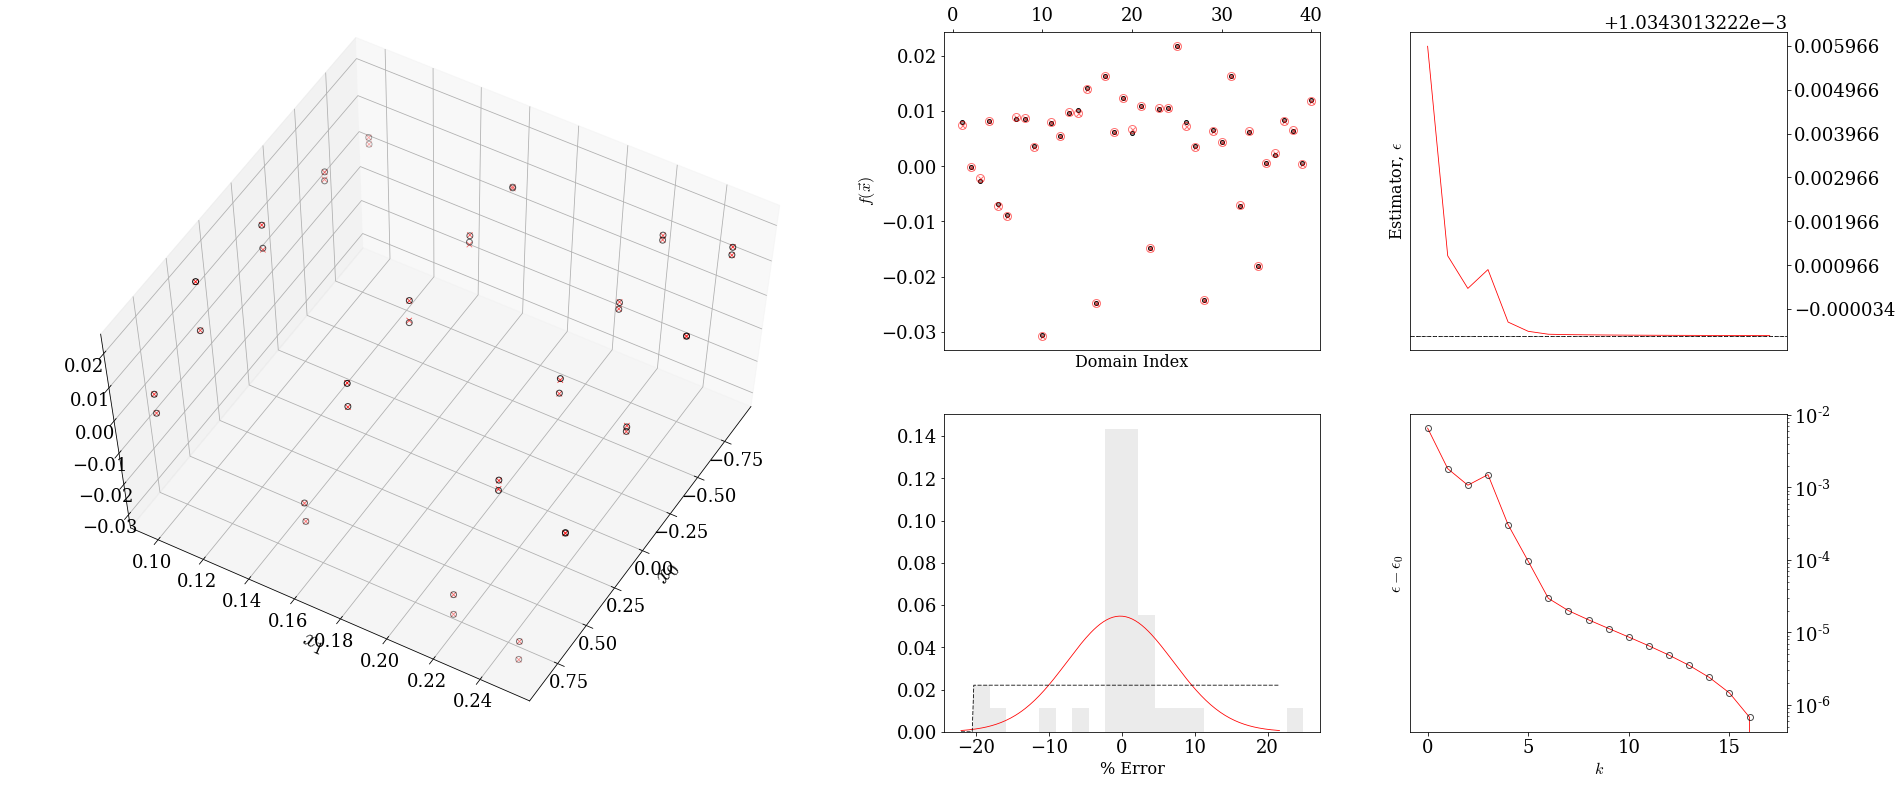

<Figure size 907.2x432 with 0 Axes>

In [23]:
advanced_gmvx_plot(foo)